Dear Participant,

Please find below the Ensemble Techniques project.


Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.


Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at -   https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

The data consists of those diagnosed with Parkinson Disease and those who do not.


Steps to be followed:


1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## 1. Load the dataset

In [2]:
parkinsons_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')

In [3]:
parkinsons_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
parkinsons_df = parkinsons_df.drop('name', axis=1)
parkinsons_df.sample(3)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
151,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
10,88.333,112.240,84.072,0.00505,0.00006,0.00254,0.00330,0.00763,0.02143,0.197,...,0.03237,0.01166,21.118,1,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740
179,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,...,0.02175,0.00540,23.683,1,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730


## 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [5]:
parkinsons_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
# Datatype Sanitizations
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null flo

In [7]:
parkinsons_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [8]:
# Missing values ? No.
parkinsons_df[parkinsons_df.isnull().any(axis=1)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


## 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

count    195.000000
mean     154.228641
std       41.390065
min       88.333000
25%      117.572000
50%      148.790000
75%      182.769000
max      260.105000
Name: MDVP:Fo(Hz), dtype: float64
count    195.000000
mean     197.104918
std       91.491548
min      102.145000
25%      134.862500
50%      175.829000
75%      224.205500
max      592.030000
Name: MDVP:Fhi(Hz), dtype: float64
count    195.000000
mean     116.324631
std       43.521413
min       65.476000
25%       84.291000
50%      104.315000
75%      140.018500
max      239.170000
Name: MDVP:Flo(Hz), dtype: float64
count    195.000000
mean       0.006220
std        0.004848
min        0.001680
25%        0.003460
50%        0.004940
75%        0.007365
max        0.033160
Name: MDVP:Jitter(%), dtype: float64
count    195.000000
mean       0.000044
std        0.000035
min        0.000007
25%        0.000020
50%        0.000030
75%        0.000060
max        0.000260
Name: MDVP:Jitter(Abs), dtype: float64
count    195.000000


c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


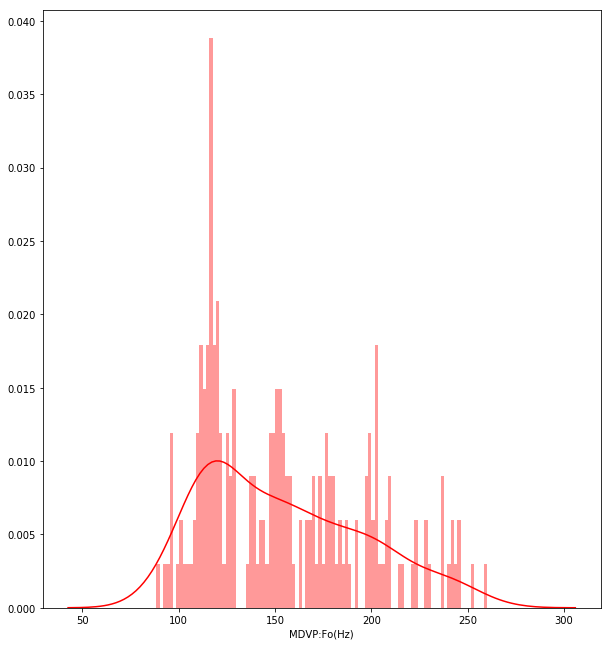

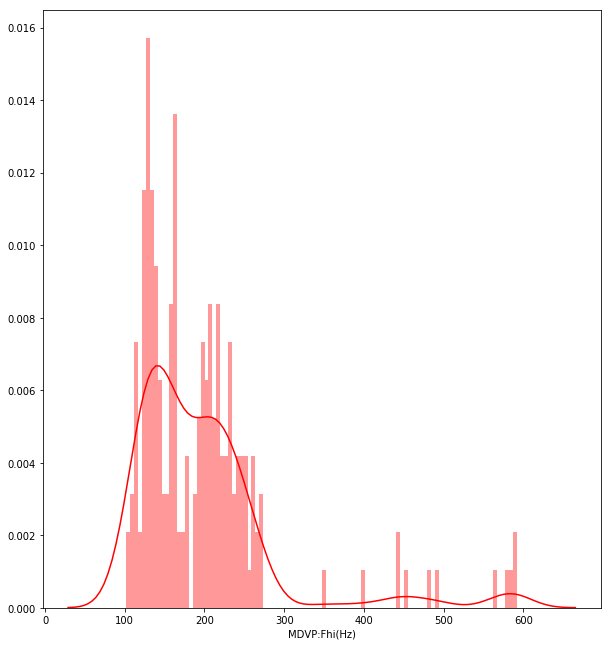

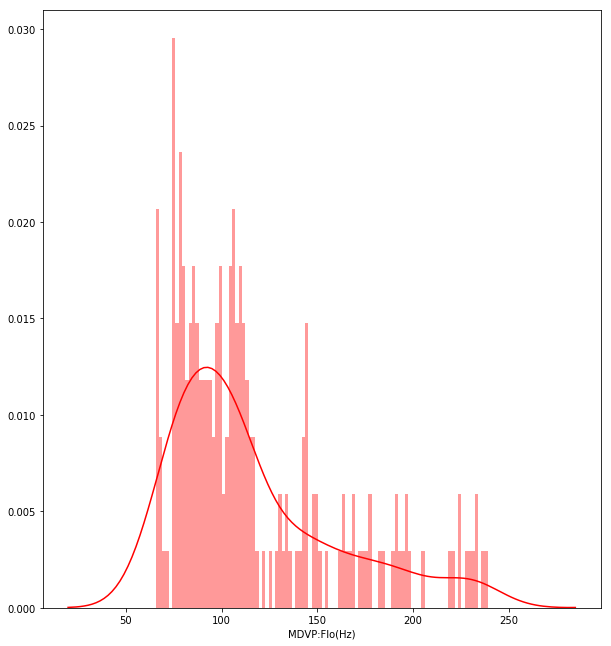

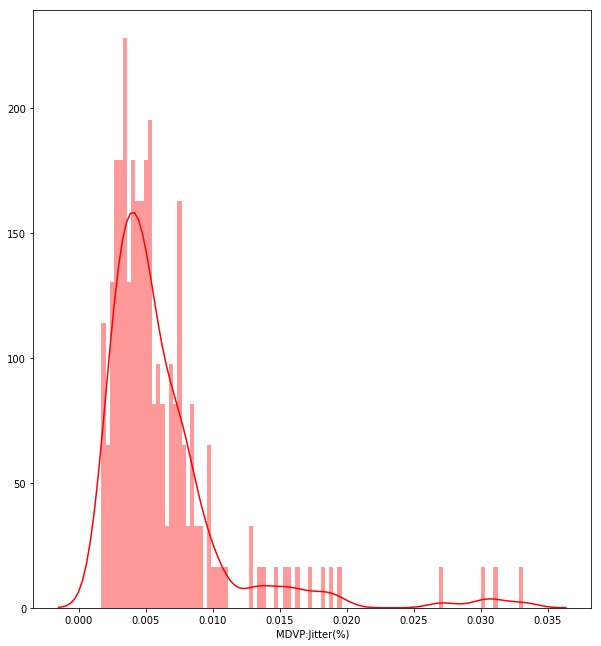

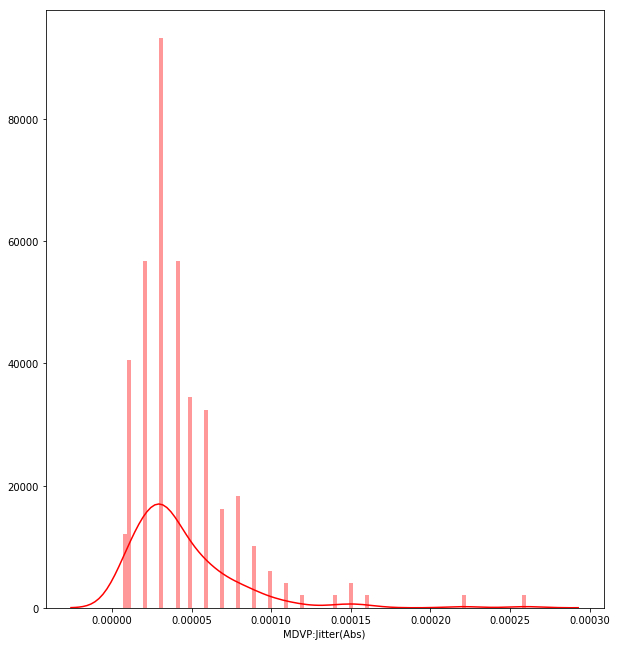

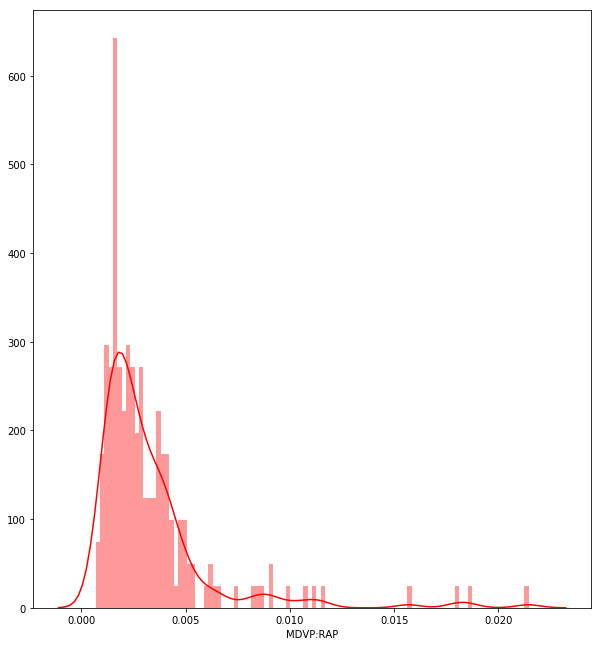

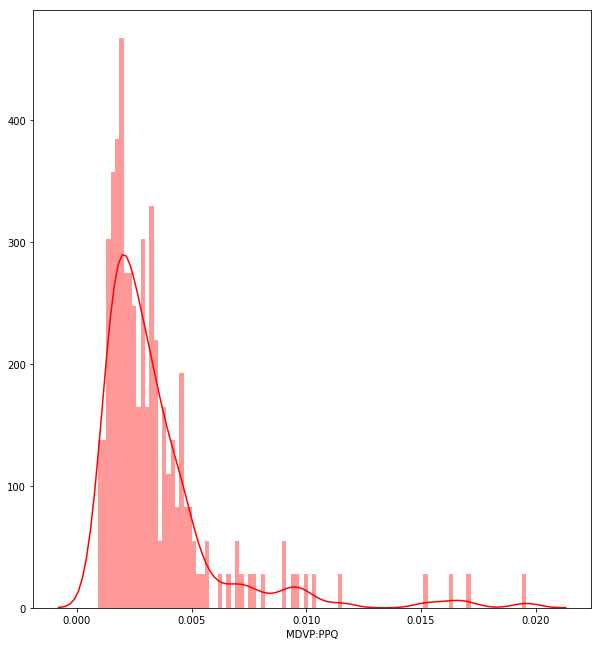

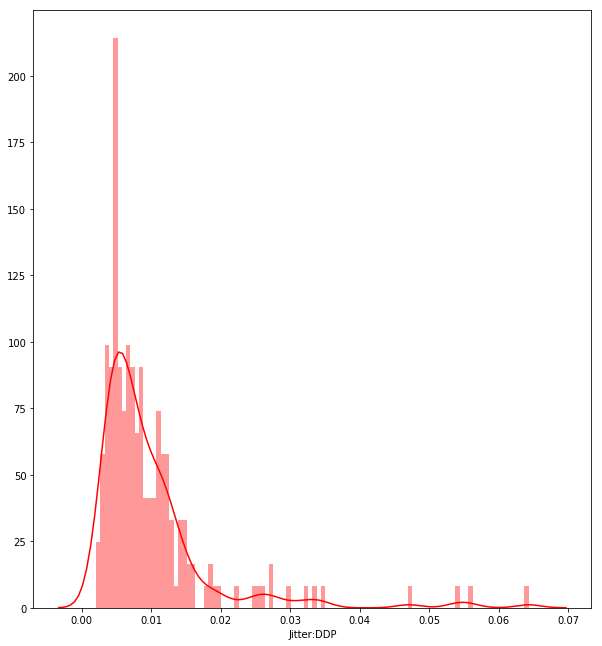

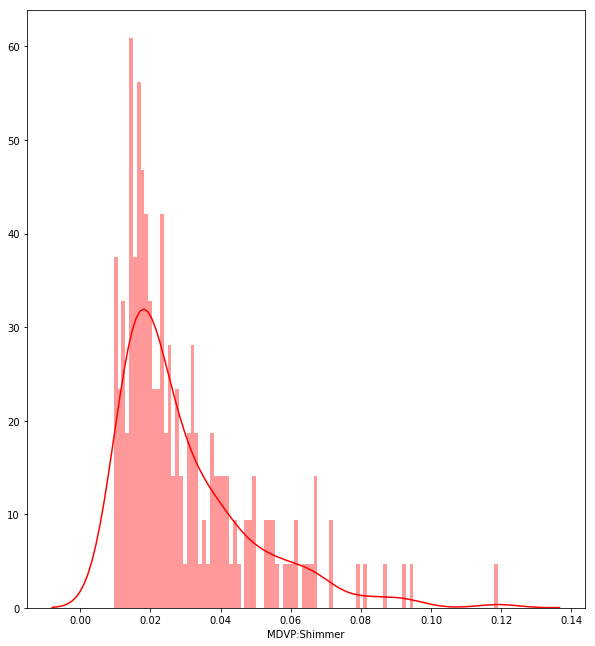

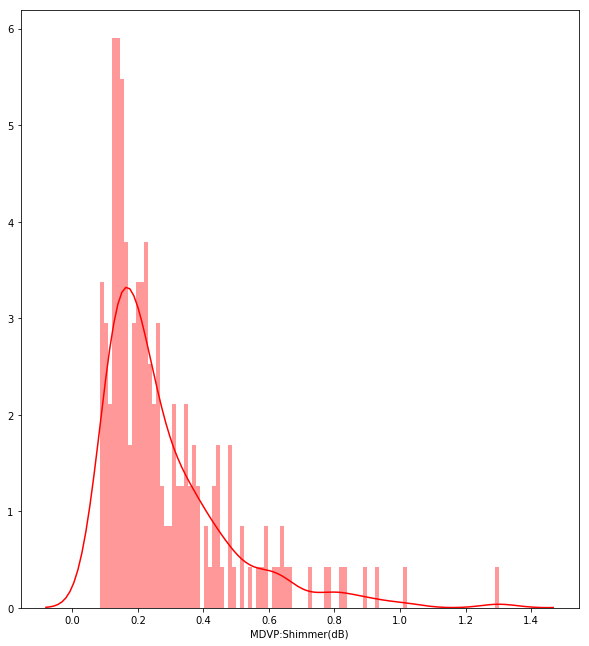

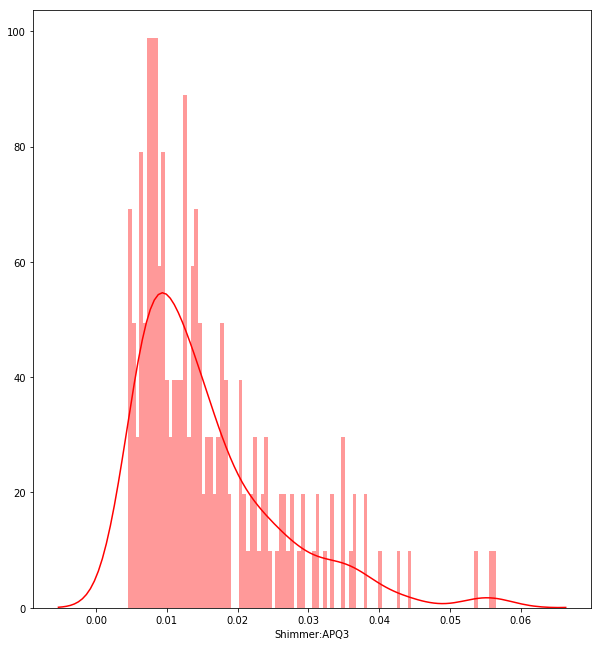

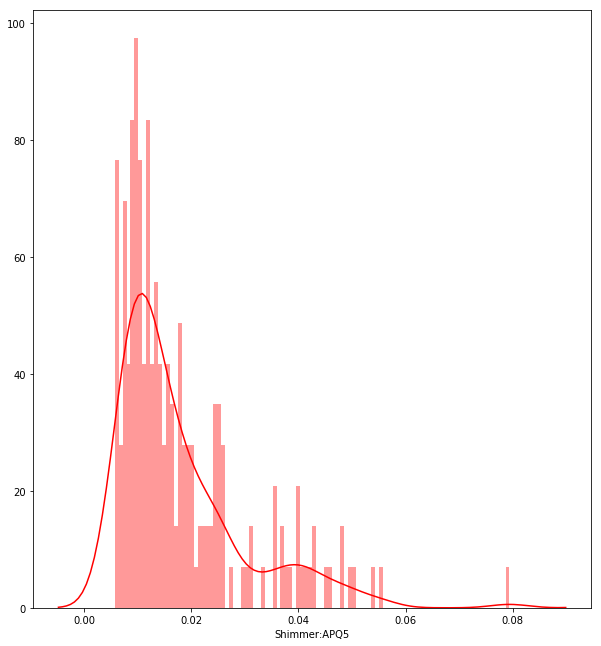

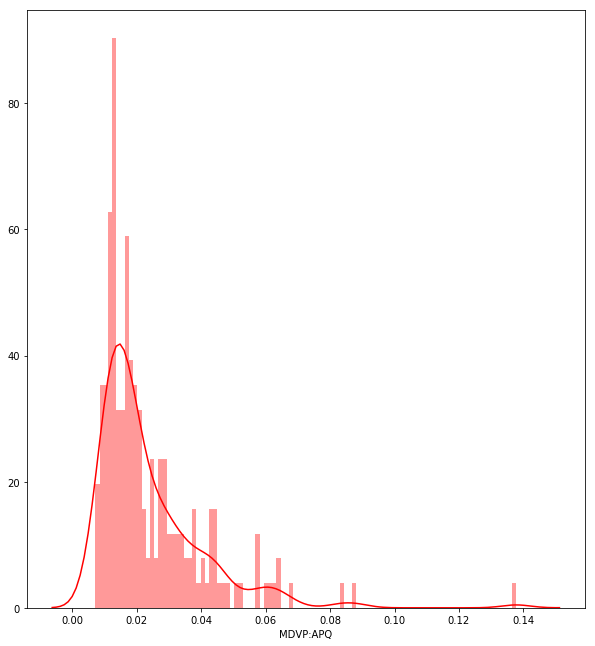

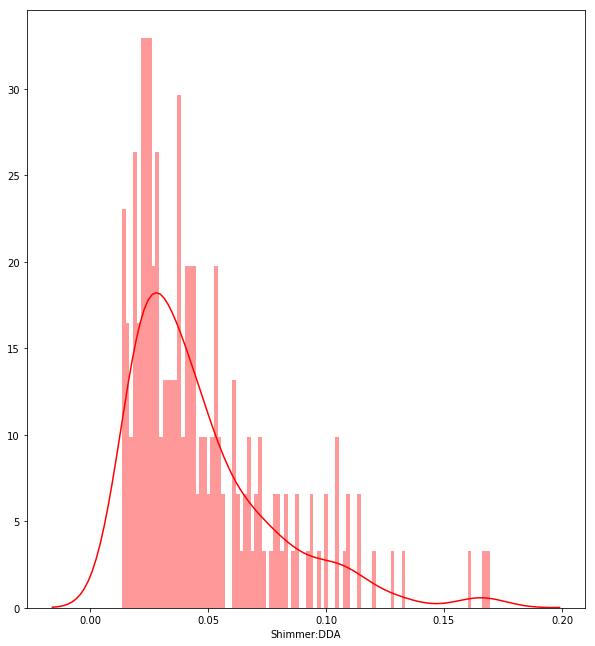

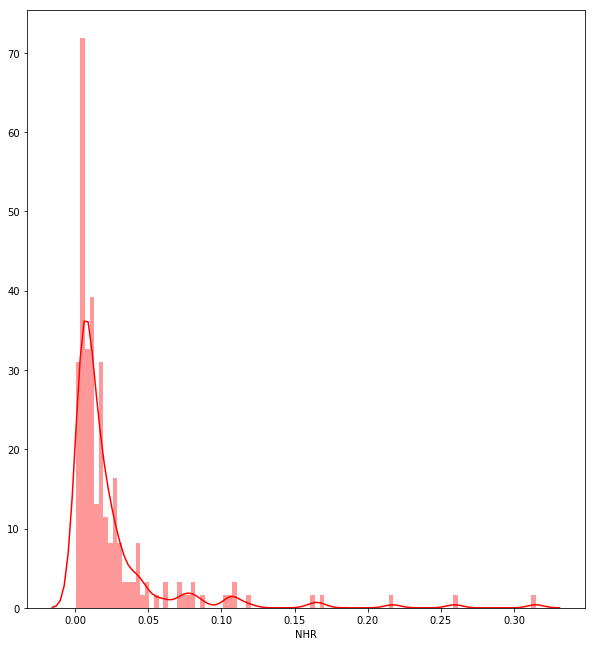

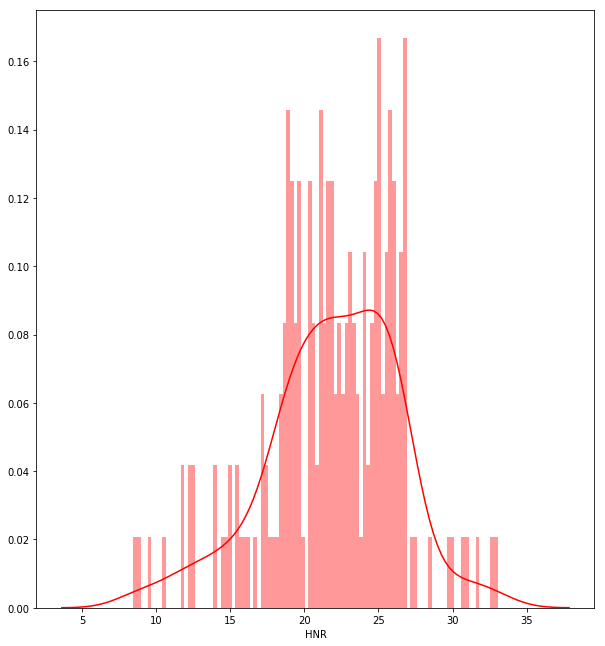

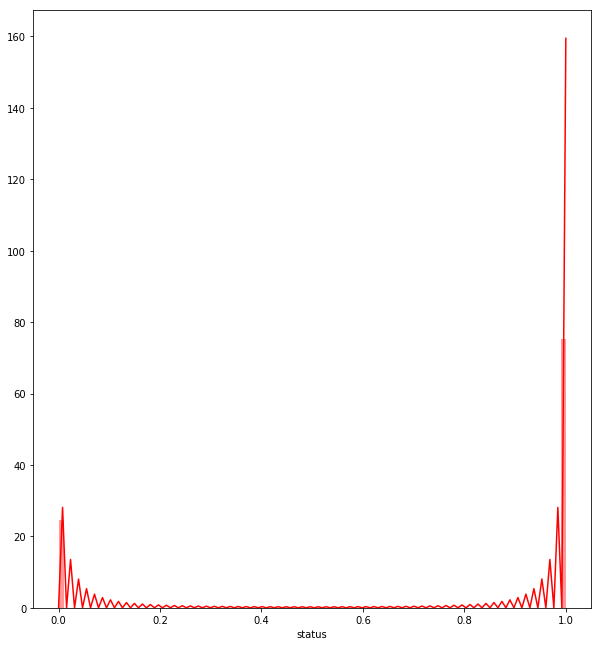

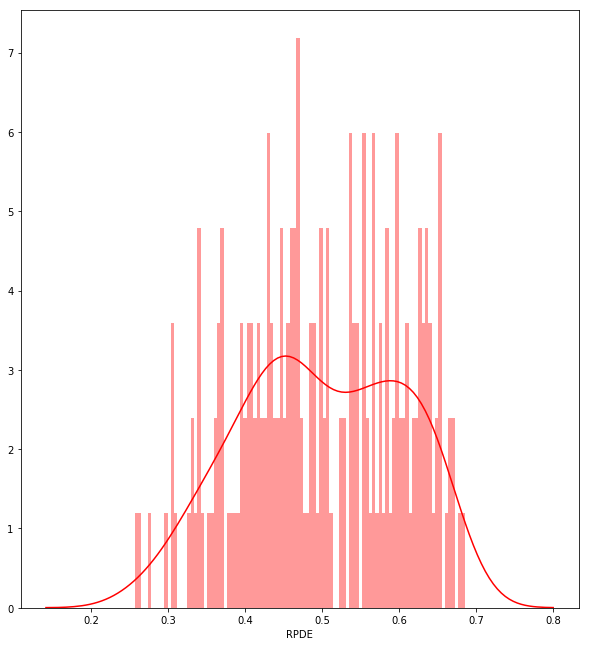

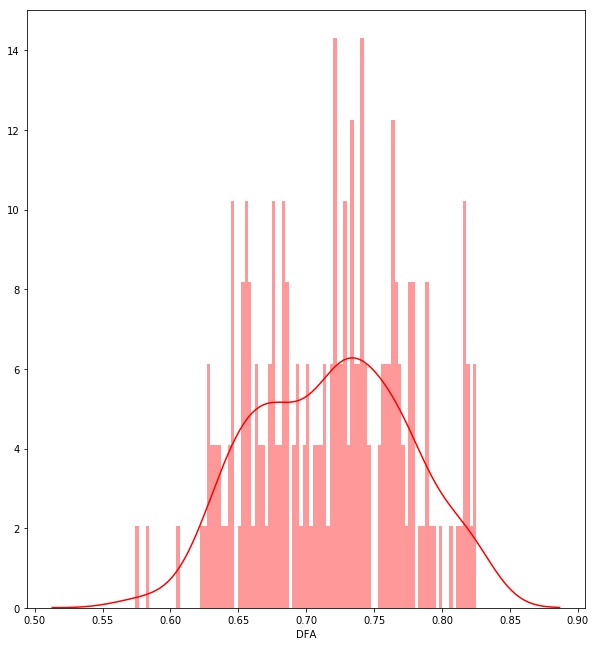

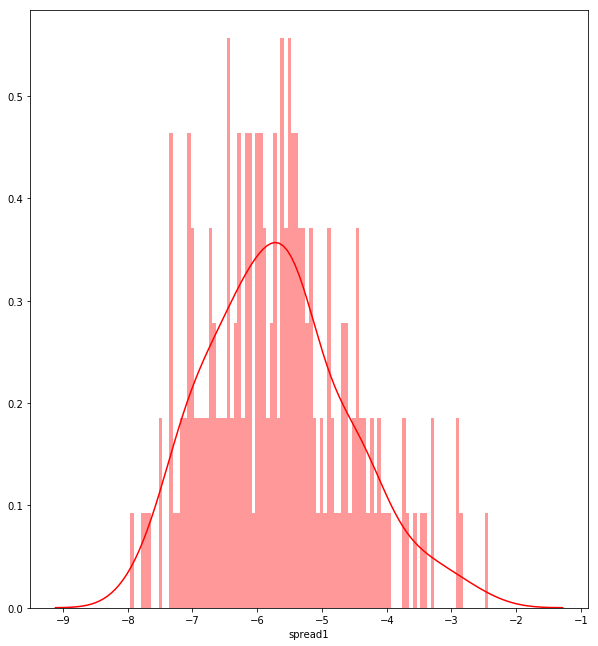

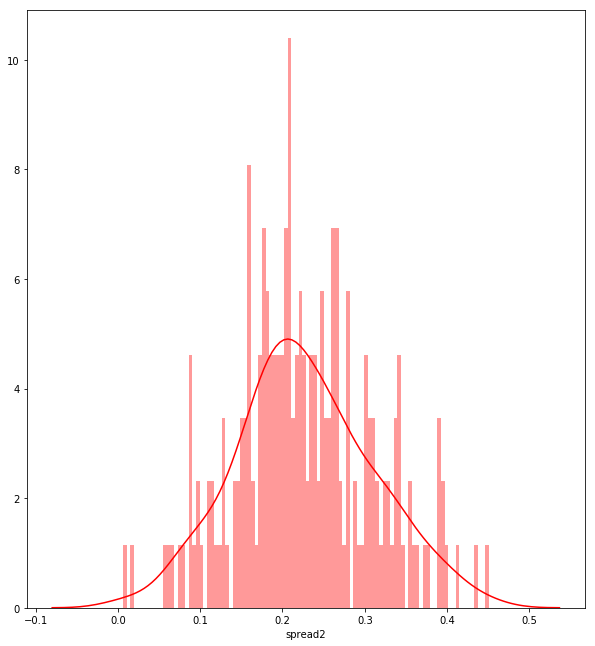

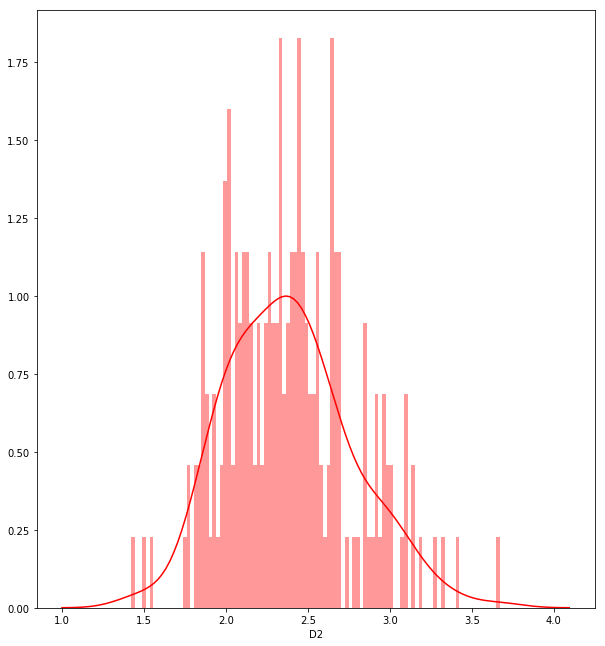

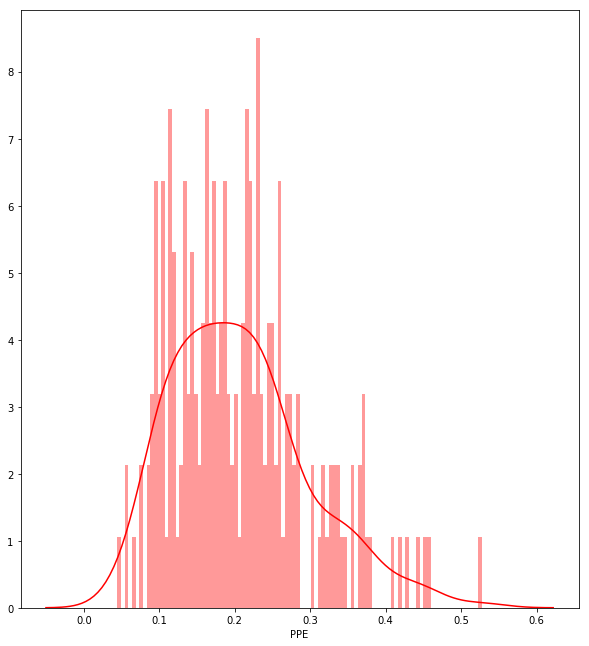

In [9]:
for col in parkinsons_df:
    print(parkinsons_df[col].describe())
    plt.figure(figsize=(10, 11))
    sns.distplot(parkinsons_df[col], color='r', bins=100, hist_kws={'alpha': 0.4})

**The following columns have right tailed skewed distributions**
1. MDVP:Fo(Hz)
2. MDVP:Fhi(Hz) 
3. MDVP:Flo(Hz)
4. MDVP:Jitter(%)
5. MDVP:Jitter(Abs)
6. MDVP:RAP
7. MDVP:PPQ
8. Jitter:DDP 
9. MDVP:Shimmer
10. MDVP:Shimmer(dB)
11. Shimmer:APQ3
12. Shimmer:APQ5
13. MDVP:APQ
14. Shimmer:DDA
15. NHR

**The following columns have moderate / normal distribution.**
1. HNR
2. RPDE
3. DFA
4. spread1
5. spread2
6. D2
7. PPE

Among the above mentioned "HNR" & "PPE" are slightly left & right skewed respectively.

**The following columns requires pre-processing & needs to be normalized**

1. MDVP:Fo(Hz) 
2. MDVP:Fhi(Hz) 
3. MDVP:Flo(Hz)
4. HNR

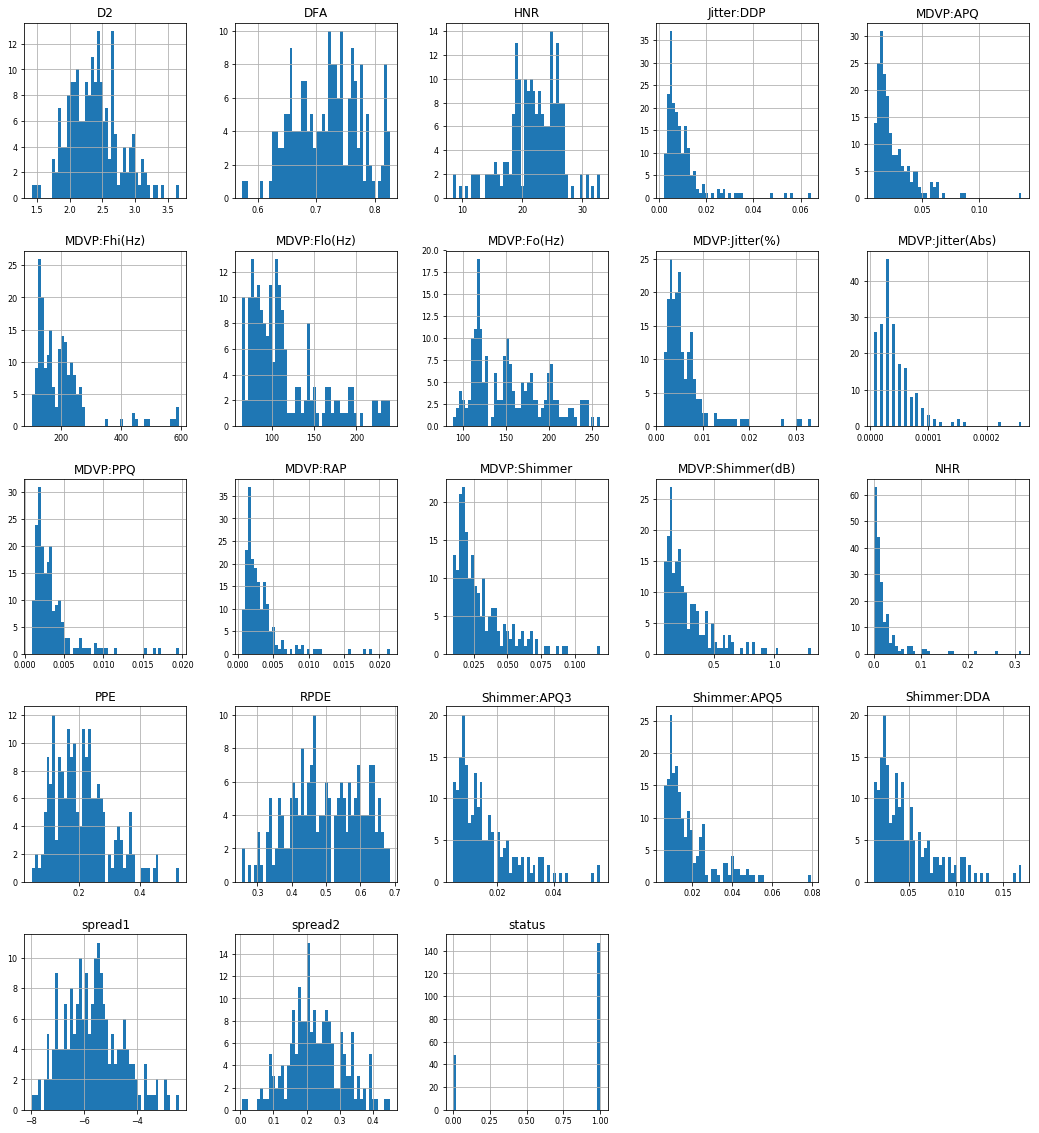

In [10]:
parkinsons_df.hist(figsize=(18, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [11]:
# Checking for Correlation
parkinsons_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


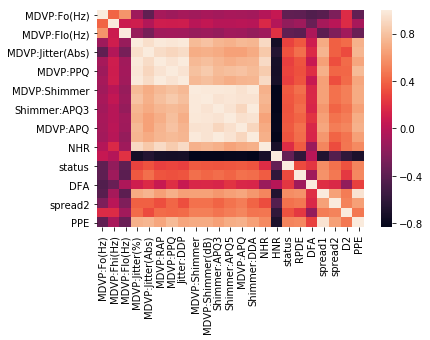

In [12]:
sns.heatmap(parkinsons_df.corr())

In [13]:
parkinsons_df_num_corr = parkinsons_df.corr()['status'][:-7]
important_features = parkinsons_df_num_corr[abs(parkinsons_df_num_corr) > 0.3].sort_values(ascending=False)

The following features have strong correlation with the status as they showing correlation above 0.3 with status (target) variable. The following important features would be used for building the model

In [14]:
important_features

MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
MDVP:Jitter(Abs)    0.338653
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64

In [15]:
df_corr = parkinsons_df[['MDVP:Shimmer','MDVP:APQ','Shimmer:APQ5','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:DDA','MDVP:Jitter(Abs)','HNR','MDVP:Flo(Hz)','MDVP:Fo(Hz)']]
df_corr.head(2)

,MDVP:Shimmer,MDVP:APQ,Shimmer:APQ5,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:DDA,MDVP:Jitter(Abs),HNR,MDVP:Flo(Hz),MDVP:Fo(Hz)
0,0.04374,0.02971,0.03130,0.426,0.02182,0.06545,0.00007,21.033,74.997,119.992
1,0.06134,0.04368,0.04518,0.626,0.03134,0.09403,0.00008,19.085,113.819,122.400


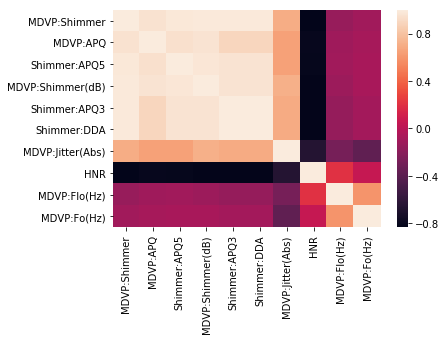

In [16]:
# Heatmap
sns.heatmap(df_corr.corr())

The properties 'MDVP:Shimmer','MDVP:APQ','Shimmer:APQ5','MDVP:Shimmer(dB)', 'Shimmer:APQ3','Shimmer:DDA' are strongly correlated to each other.

In [17]:
df_corr.corr()

,MDVP:Shimmer,MDVP:APQ,Shimmer:APQ5,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:DDA,MDVP:Jitter(Abs),HNR,MDVP:Flo(Hz),MDVP:Fo(Hz)
MDVP:Shimmer,1.000000,0.950083,0.982835,0.987258,0.987625,0.987626,0.703322,-0.835271,-0.144543,-0.098374
MDVP:APQ,0.950083,1.000000,0.949146,0.960977,0.896645,0.896647,0.648793,-0.800407,-0.107293,-0.077774
Shimmer:APQ5,0.982835,0.949146,1.000000,0.973751,0.960070,0.960072,0.648961,-0.813753,-0.101095,-0.070682
MDVP:Shimmer(dB),0.987258,0.960977,0.973751,1.000000,0.963198,0.963202,0.716601,-0.827805,-0.119089,-0.073742
Shimmer:APQ3,0.987625,0.896645,0.960070,0.963198,1.000000,1.000000,0.697153,-0.827123,-0.150747,-0.094717
Shimmer:DDA,0.987626,0.896647,0.960072,0.963202,1.000000,1.000000,0.697170,-0.827130,-0.150737,-0.094732
MDVP:Jitter(Abs),0.703322,0.648793,0.648961,0.716601,0.697153,0.697170,1.000000,-0.656810,-0.277815,-0.382027
HNR,-0.835271,-0.800407,-0.813753,-0.827805,-0.827123,-0.827130,-0.656810,1.000000,0.210851,0.059144
MDVP:Flo(Hz),-0.144543,-0.107293,-0.101095,-0.119089,-0.150747,-0.150737,-0.277815,0.210851,1.000000,0.596546
MDVP:Fo(Hz),-0.098374,-0.077774,-0.070682,-0.073742,-0.094717,-0.094732,-0.382027,0.059144,0.596546,1.000000


The HNR feature has a strong negative correlation with 'MDVP:Shimmer','MDVP:APQ','Shimmer:APQ5','MDVP:Shimmer(dB)', 'Shimmer:APQ3' properties. Hence we will have to remove the multi-colinearity

In [18]:
predictor_variables = ['MDVP:Shimmer','MDVP:APQ','Shimmer:APQ5','MDVP:Shimmer(dB)',
           'Shimmer:APQ3','Shimmer:DDA','MDVP:Jitter(Abs)','HNR','MDVP:Flo(Hz)','MDVP:Fo(Hz)']
parkinsons_df_predictor = parkinsons_df[predictor_variables].copy(deep = True)
parkinsons_df_predictor = parkinsons_df_predictor.dropna()
parkinsons_df_predictor.sample(3)

,MDVP:Shimmer,MDVP:APQ,Shimmer:APQ5,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:DDA,MDVP:Jitter(Abs),HNR,MDVP:Flo(Hz),MDVP:Fo(Hz)
101,0.06170,0.05174,0.03672,0.584,0.03223,0.09669,0.00012,15.060,75.632,128.451
164,0.02814,0.02073,0.01553,0.272,0.01579,0.04736,0.00009,18.447,85.902,102.273
67,0.03111,0.02603,0.01759,0.308,0.01638,0.04914,0.00007,19.979,66.004,136.969


In [19]:
threshold = 90
for i in np.arange(0,len(predictor_variables)):
    var_infactor = [variance_inflation_factor(parkinsons_df_predictor[predictor_variables].values, j) 
    for j in range(parkinsons_df_predictor[predictor_variables].shape[1])]
    maxindex = var_infactor.index(max(var_infactor))
    if max(var_infactor) > threshold:
        print ("Variable Inflation Factor :", var_infactor)
        print('Eliminating \'' + parkinsons_df_predictor[predictor_variables].columns[maxindex] + '\' at index: ' + str(maxindex))
        del predictor_variables[maxindex]
    else:
        break

Variable Inflation Factor : [1813.7952617552196, 123.90509221189244, 131.27130341336556, 183.9009967841099, 47609627.276881866, 47599495.16977536, 7.4341886290044235, 15.7762866262096, 14.02010034690471, 23.628958703288898]
Eliminating 'Shimmer:APQ3' at index: 4
Variable Inflation Factor : [1808.3426194677895, 123.8428183084042, 131.05059621439256, 183.52314417471823, 598.6530691017277, 7.394410762712215, 15.767061380067766, 13.947522787960283, 23.555113476010163]
Eliminating 'MDVP:Shimmer' at index: 0
Variable Inflation Factor : [56.357540365614454, 96.49050187977628, 159.88616802595752, 74.21151669570689, 7.179741314650111, 13.906528349322683, 13.642646146204237, 23.544112877568054]
Eliminating 'MDVP:Shimmer(dB)' at index: 2


In [20]:
predictor_variables

['MDVP:APQ',
 'Shimmer:APQ5',
 'Shimmer:DDA',
 'MDVP:Jitter(Abs)',
 'HNR',
 'MDVP:Flo(Hz)',
 'MDVP:Fo(Hz)']

In [21]:
# Renaming column names
parkinsons_df = parkinsons_df.rename(columns={'MDVP:APQ': 'MDVP_APQ', 'Shimmer:APQ5': 'Shimmer_APQ5','Shimmer:DDA':'Shimmer_DDA',
                        'MDVP:Jitter(Abs)':'MDVP_Jitter_Abs','MDVP:Flo(Hz)':'MDVP_Flo_Hz','MDVP:Fo(Hz)':'MDVP_Fo_Hz'})

parkinsons_df_predictor = parkinsons_df_predictor.rename(columns={'MDVP:APQ': 'MDVP_APQ', 'Shimmer:APQ5': 'Shimmer_APQ5','Shimmer:DDA':'Shimmer_DDA',
                        'MDVP:Jitter(Abs)':'MDVP_Jitter_Abs','MDVP:Flo(Hz)':'MDVP_Flo_Hz','MDVP:Fo(Hz)':'MDVP_Fo_Hz'})

In [22]:
parkinsons_df.head(3)

,MDVP_Fo_Hz,MDVP:Fhi(Hz),MDVP_Flo_Hz,MDVP:Jitter(%),MDVP_Jitter_Abs,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [23]:
parkinsons_df_predictor.head(2)

,MDVP:Shimmer,MDVP_APQ,Shimmer_APQ5,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer_DDA,MDVP_Jitter_Abs,HNR,MDVP_Flo_Hz,MDVP_Fo_Hz
0,0.04374,0.02971,0.03130,0.426,0.02182,0.06545,0.00007,21.033,74.997,119.992
1,0.06134,0.04368,0.04518,0.626,0.03134,0.09403,0.00008,19.085,113.819,122.400


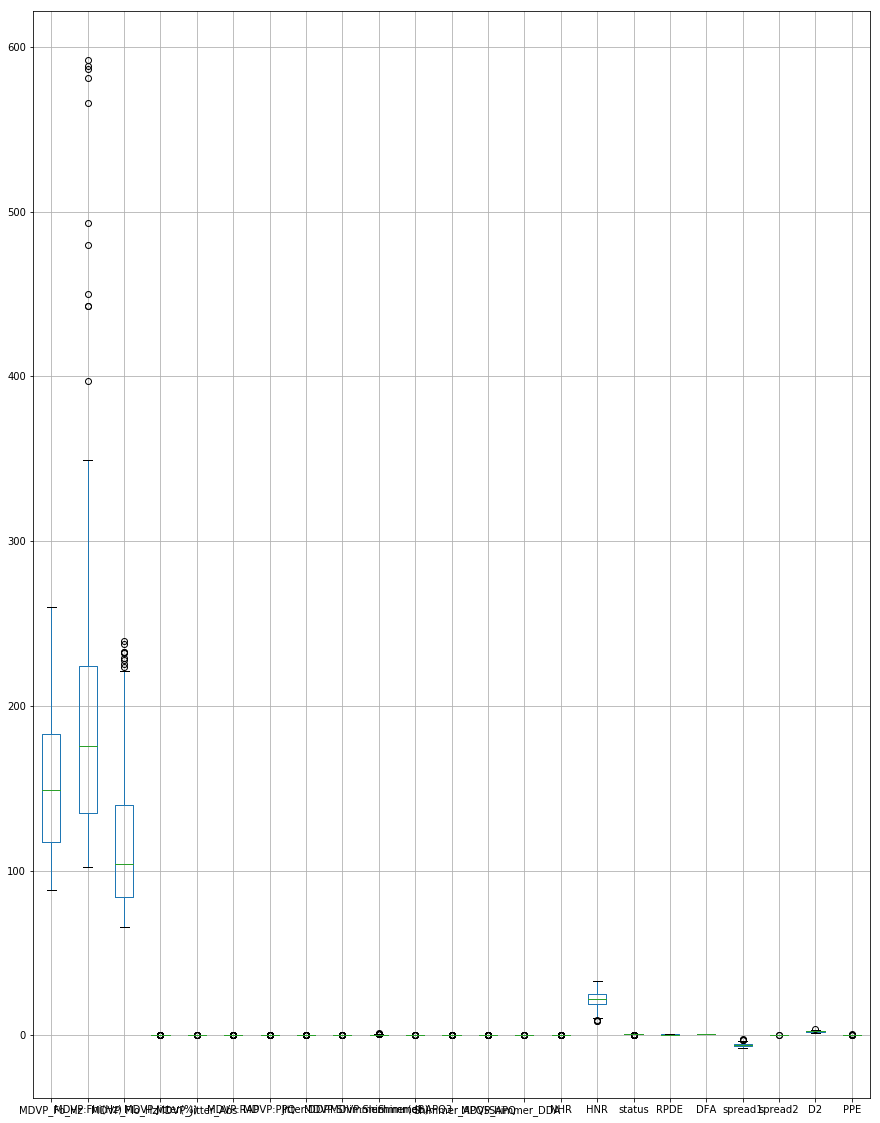

In [24]:
#Before Outlier Detection
parkinsons_df.boxplot(figsize=(15, 20))

In [25]:
parkinsons_df.shape

(195, 23)

In [26]:
#Removing Outliers
parkinsons_df_outliers = parkinsons_df[(np.abs(stats.zscore(parkinsons_df)) < 3).all(axis=1)]

In [27]:
#After Outlier Detection
parkinsons_df_outliers.shape

(181, 23)

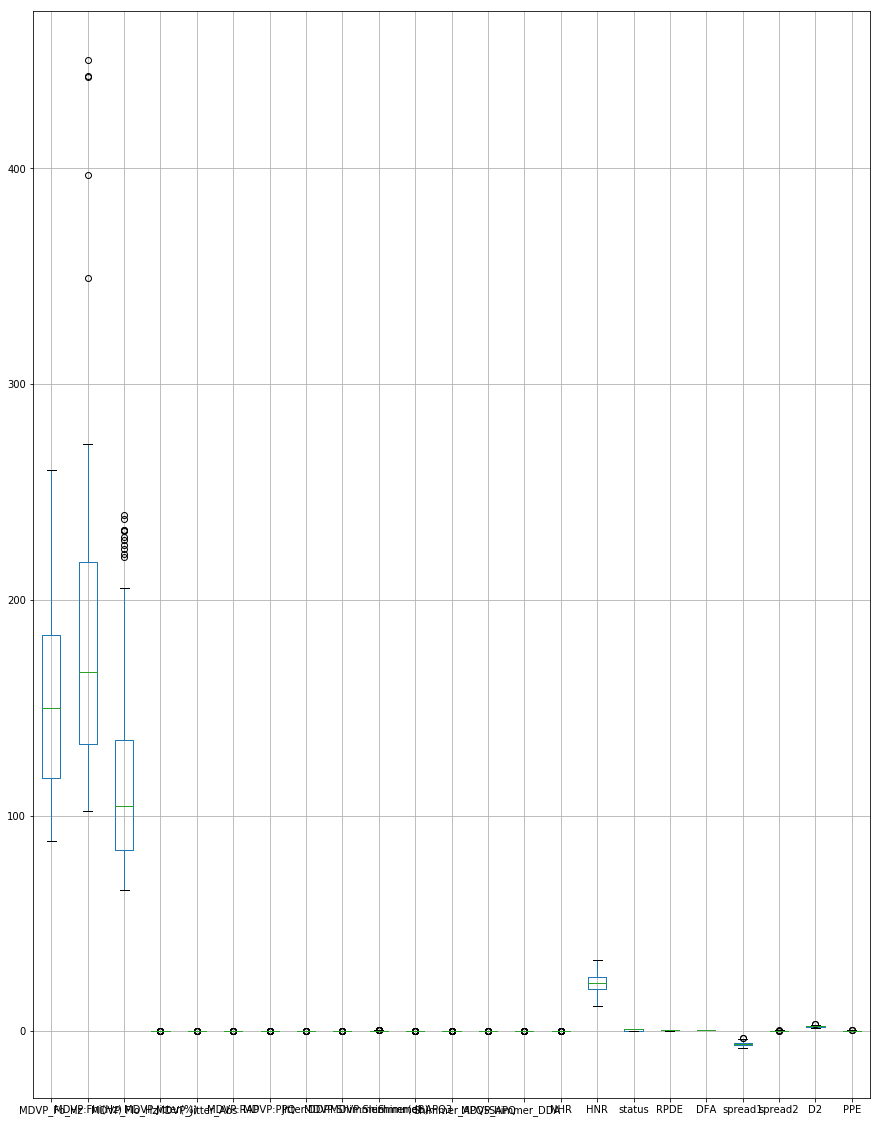

In [28]:
parkinsons_df_outliers.boxplot(figsize=(15, 20))

In [29]:
final_variables = ['MDVP_APQ','Shimmer_APQ5','Shimmer_DDA','MDVP_Jitter_Abs','HNR','MDVP_Flo_Hz','MDVP_Fo_Hz','status']
dataset = parkinsons_df[final_variables].copy(deep = True)
dataset.head()

,MDVP_APQ,Shimmer_APQ5,Shimmer_DDA,MDVP_Jitter_Abs,HNR,MDVP_Flo_Hz,MDVP_Fo_Hz,status
0,0.02971,0.03130,0.06545,0.00007,21.033,74.997,119.992,1
1,0.04368,0.04518,0.09403,0.00008,19.085,113.819,122.400,1
2,0.03590,0.03858,0.08270,0.00009,20.651,111.555,116.682,1
3,0.03772,0.04005,0.08771,0.00009,20.644,111.366,116.676,1
4,0.04465,0.04825,0.10470,0.00011,19.649,110.655,116.014,1


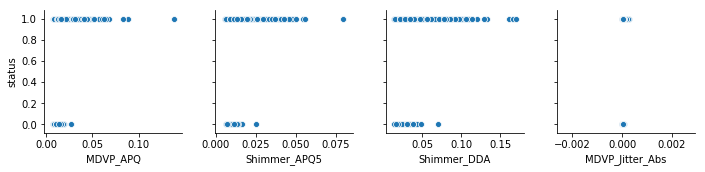

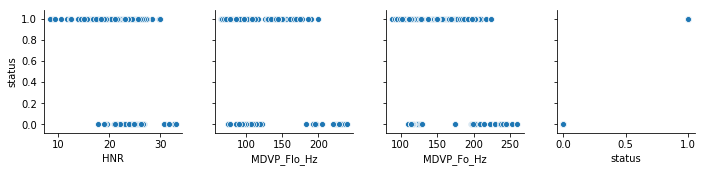

In [30]:
for i in range(0, len(dataset.columns),4):
    sns.pairplot(data=dataset,
                x_vars=dataset.columns[i:i+4],
                y_vars=['status'])

## 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [31]:
# Pre-processing
std_scale = StandardScaler()
dataset['MDVP_APQ'] = std_scale.fit_transform(dataset[['MDVP_APQ']])
dataset['Shimmer_APQ5'] = std_scale.fit_transform(dataset[['Shimmer_APQ5']])
dataset['Shimmer_DDA'] = std_scale.fit_transform(dataset[['Shimmer_DDA']])
dataset['MDVP_Jitter_Abs'] = std_scale.fit_transform(dataset[['MDVP_Jitter_Abs']])
dataset['HNR'] = std_scale.fit_transform(dataset[['HNR']])
dataset['MDVP_Flo_Hz'] = std_scale.fit_transform(dataset[['MDVP_Flo_Hz']])
dataset['MDVP_Fo_Hz'] = std_scale.fit_transform(dataset[['MDVP_Fo_Hz']])

In [32]:
dataset.sample(4)

,MDVP_APQ,Shimmer_APQ5,Shimmer_DDA,MDVP_Jitter_Abs,HNR,MDVP_Flo_Hz,MDVP_Fo_Hz,status
80,0.276782,0.552975,0.691137,0.749759,-0.641304,-0.732893,-1.407880,1
56,0.233004,0.428735,0.460071,0.749759,-0.105105,-0.298427,-1.061231,1
54,-0.201825,-0.149110,-0.082045,0.749759,-0.194358,-0.309853,-1.100229,1
13,-0.361557,-0.713614,-0.827908,-0.401899,0.680279,-0.916124,-0.364686,1


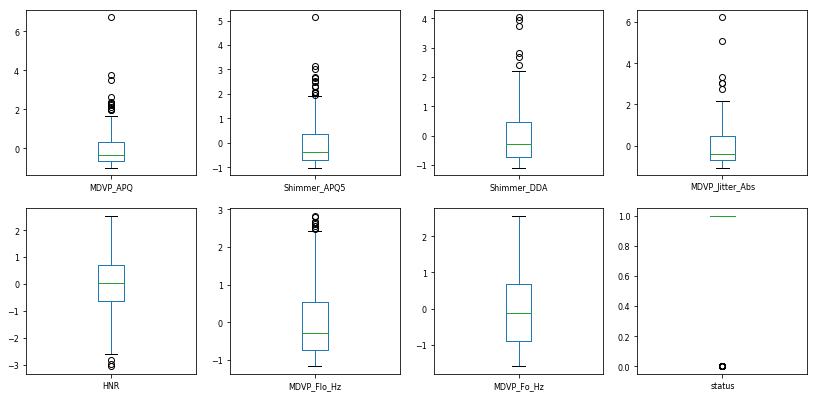

In [33]:
dataset.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
pyplot.show()

In [34]:
X = dataset.drop('status', axis=1)
Y = dataset[['status']]
split = 0.30
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split, random_state=seed)

In [35]:
X_train.shape

(136, 7)

In [36]:
X_test.shape

(59, 7)

## 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [37]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [38]:
dt_model.score(X_test, Y_test)

0.8813559322033898

In [39]:
y_predict = dt_model.predict(X_test)

In [40]:
# Confusion Matrix
metrics.confusion_matrix(Y_test, y_predict)

array([[16,  3],
       [ 4, 36]], dtype=int64)

## 7.Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

In [41]:
DTClassifier_new = DecisionTreeClassifier (max_depth=30, min_samples_leaf=20)
DTClassifier_new.fit(X_train, Y_train)
DTClassifier_new.score(X_test, Y_test)

0.7796610169491526

In [42]:
DTClassifier_new = DecisionTreeClassifier (max_depth=10, min_samples_leaf=22)
DTClassifier_new.fit(X_train, Y_train)
DTClassifier_new.score(X_test, Y_test)

0.8135593220338984

In [43]:
DTClassifier_new = DecisionTreeClassifier (max_depth=10, min_samples_leaf=30)
DTClassifier_new.fit(X_train, Y_train)
DTClassifier_new.score(X_test, Y_test)

0.6779661016949152

In [44]:
DTClassifier_new = DecisionTreeClassifier (max_depth=10, min_samples_leaf=40)
DTClassifier_new.fit(X_train, Y_train)
DTClassifier_new.score(X_test, Y_test)

0.6779661016949152


**Observation : Max_Depth does not have effect on accuracy - if we keep increasing the min_samples_leaf then the accuracy decrease**
**The Optimal leaf count was 22 for the highest recorded accuracy**

## 8.Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [45]:
rfcl = RandomForestClassifier(n_estimators = 10)
rfcl = rfcl.fit(X_train, Y_train)
rfcl.score(X_test, Y_test)

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9152542372881356

In [46]:
rfcl = RandomForestClassifier(n_estimators = 20)
rfcl = rfcl.fit(X_train, Y_train)
rfcl.score(X_test, Y_test)

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.847457627118644

In [47]:
rfcl = RandomForestClassifier(n_estimators = 30)
rfcl = rfcl.fit(X_train, Y_train)
rfcl.score(X_test, Y_test)

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8305084745762712

In [48]:
rfcl = RandomForestClassifier(n_estimators = 40)
rfcl = rfcl.fit(X_train, Y_train)
rfcl.score(X_test, Y_test)

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8813559322033898

In [49]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, Y_train)
rfcl.score(X_test, Y_test)

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8813559322033898

In [50]:
rfcl = RandomForestClassifier(n_estimators = 60)
rfcl = rfcl.fit(X_train, Y_train)
rfcl.score(X_test, Y_test)

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8813559322033898

**Observation : With 10-20 estimators the accuracy is highest (ranges between 0.91 to 0.84) , after 40 estimators the accuracy stablizes to 0.88**